## Importing the dataset and packages

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('Food_Delivery_Times.csv')
df.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


## Observating exploring and validating the DataFreame

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [54]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [64]:
df = df.dropna()
df.isna().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [66]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,883.000000,883.000000,883.000000,883.000000,883.000000
mean,508.109853,10.051586,17.019253,4.639864,56.425821
std,287.925161,5.688582,7.260201,2.922172,21.568482
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,263.500000,5.130000,11.000000,2.000000,41.000000
50%,512.000000,10.280000,17.000000,5.000000,55.000000
75%,758.500000,15.025000,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,141.000000


In [36]:
# # Group by multiple columns
# grouped_data = sales_data.groupby(['ProductCategory', 'Region']).agg({
#     'Sales': 'mean',
#     'Quantity': 'sum'
# })
# print(grouped_data)


In [68]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [80]:
duplicates = df.duplicated().sum()
duplicates

0

In [82]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [100]:
gro_data = df.groupby(['Time_of_Day', 'Vehicle_Type']).size().reset_index(name='Count')
gro_data # The .size() method counts the number of rows in each group (i.e., the frequency of each combination of Time_of_Day and Vehicle_Type)


,Time_of_Day,Vehicle_Type,Count
0,Afternoon,Bike,140
1,Afternoon,Car,53
2,Afternoon,Scooter,91
3,Evening,Bike,150
4,Evening,Car,50
5,Evening,Scooter,93
6,Morning,Bike,140
7,Morning,Car,74
8,Morning,Scooter,94
9,Night,Bike,54


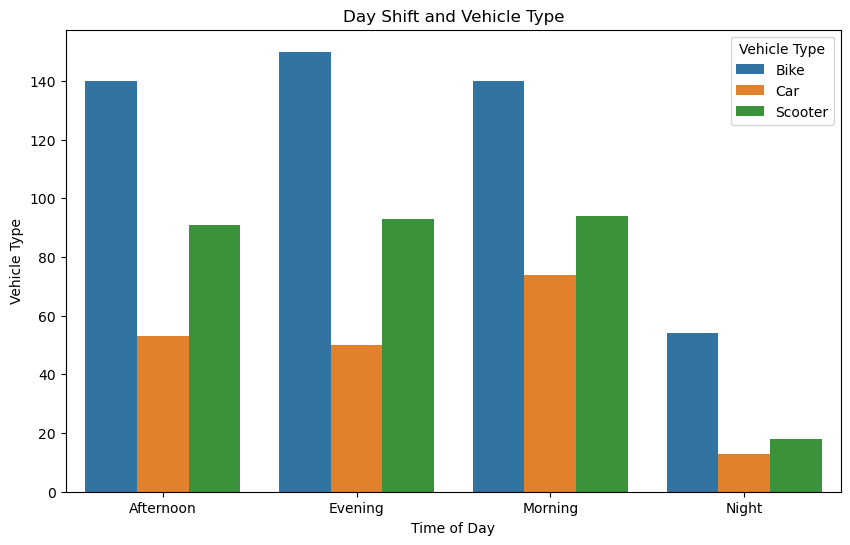

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gro_data, x='Time_of_Day', y='Count', hue='Vehicle_Type')
plt.title('Day Shift and Vehicle Type')
plt.xlabel('Time of Day')
plt.ylabel('Vehicle Type')
plt.legend(title='Vehicle Type')
plt.show()

In [108]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [138]:
distance = df.groupby(['Vehicle_Type']).agg({
    'Distance_km' : 'sum'
})
distance.reset_index()

,Vehicle_Type,Distance_km
0,Bike,5024.85
1,Car,2015.80
2,Scooter,3019.32


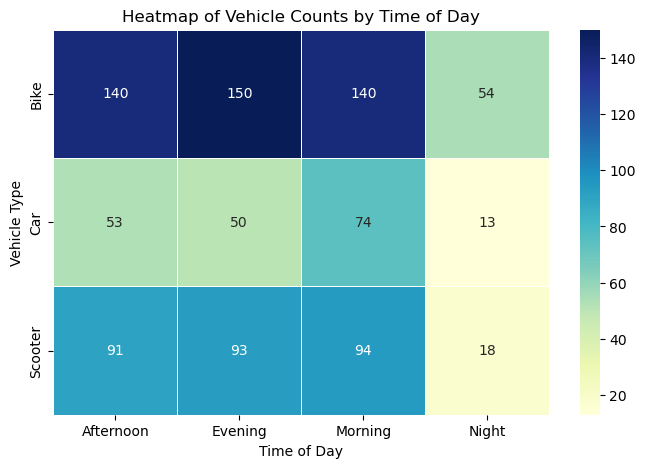

In [116]:
# Pivot the data for heatmap
heatmap_data = gro_data.pivot(index='Vehicle_Type', columns='Time_of_Day', values='Count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Vehicle Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Vehicle Type')
plt.show()


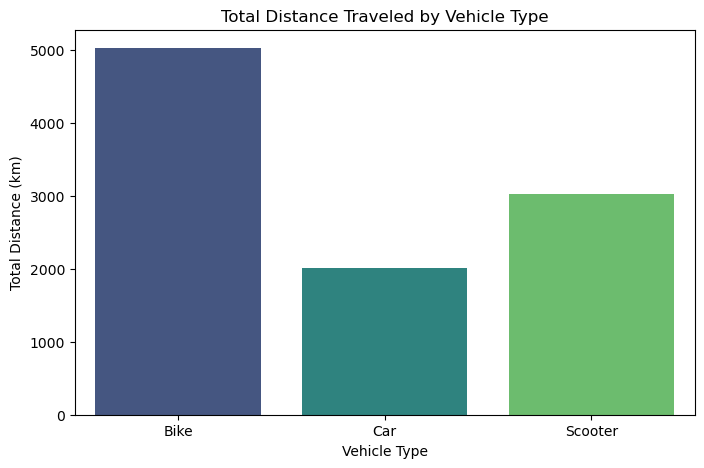

In [152]:
# Bar plot with hue argument
plt.figure(figsize=(8, 5))
sns.barplot(data=distance, x='Vehicle_Type', y='Distance_km', hue='Vehicle_Type', palette='viridis', legend=False)

# Add labels and title
plt.title('Total Distance Traveled by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Distance (km)')
plt.show()


In [154]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

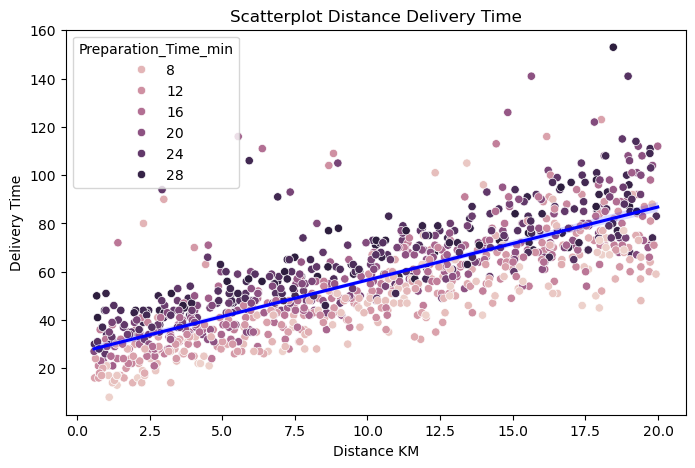

In [172]:
df_corr = df[['Distance_km', 'Delivery_Time_min']].corr()
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Distance_km', y='Delivery_Time_min', hue='Preparation_Time_min')
sns.regplot(data=df, x='Distance_km', y='Delivery_Time_min', scatter=False, color='blue', line_kws={'label': 'Linear Regression'})
plt.title('Scatterplot Distance Delivery Time')
plt.xlabel('Distance KM')
plt.ylabel('Delivery Time')
plt.show()


In [218]:
trafic = df.groupby(['Traffic_Level', 'Time_of_Day']).size().reset_index(name='Count')
trafic

,Traffic_Level,Time_of_Day,Count
0,High,Afternoon,58
1,High,Evening,55
2,High,Morning,62
3,High,Night,18
4,Low,Afternoon,119
5,Low,Evening,109
6,Low,Morning,112
7,Low,Night,27
8,Medium,Afternoon,97
9,Medium,Evening,120
